In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, generators

import os
import pathlib
import functools
import numpy as np
import tensorflow as tf
from tensorflow import keras
keras.__version__
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from tensorflow.keras import layers

!pip install pydub

from pydub import AudioSegment

In [0]:
fma_music_small = keras.utils.get_file(origin='https://os.unil.cloud.switch.ch/fma/fma_small.zip', fname='fma_small.zip',extract=True)


In [0]:
# how many samples to generate
sample_length = 10000

In [0]:
from __future__ import generators

data_location = "/root/.keras/datasets/fma_small"

# https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory

# Define a generator to produce the real music data. Distinct from model generator
def music_generator():
  for subdir, dirs, files in os.walk(data_location):
      for file in files:
          #print os.path.join(subdir, file)
          filepath = subdir + os.sep + file
          # Decodes audio
          if filepath.endswith(".mp3"):
            mp3_audio = AudioSegment.from_file(filepath, format="mp3")
            audio_array = mp3_audio.get_array_of_samples()[:sample_length]

            # Convert to tensor
            data=tf.convert_to_tensor(audio_array)
            yield data

# Initializes our generator
get_song = music_generator()

TensorShape([1000000])

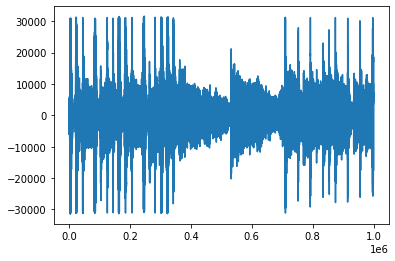

In [0]:
song = next(get_song)
plt.plot(song)
plt.show
song.shape

In [0]:
# Define the generator for the music


In [8]:
# Define the discriminator

discriminator_input = layers.Input(shape=(None,sample_length))

x = layers.LSTM(2064)(discriminator_input)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input,x)
discriminator.summary()

discriminator_optimizer = keras.optimizers.RMSprop(
    lr=0.0008,
    clipvalue=1.0,
    decay = 1e-8)

discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, 10000)]     0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2064)              99608640  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2064)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2064)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2065      
Total params: 99,610,705
Trainable params: 99,610,705
Non-trainable params: 0
_________________________________________________________________
